<h1><center>Redes Neuronales con Keras y Scikit</center></h1>


<center><i>Creando nuestra primera red neuronal</i></center>

# <h1>Contenido</h1>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
    <ol>
        <li><a href="#problema">Contexto Analítico</a></li>          
        <li><a href="#arquitectura">Arquitectura propuesta</a></li>
        <li><a href="#keras">Entrenamiento y Evaluación del Modelo</a></li>
    </ol>
</div>
<br>
<hr>

# <h1 id="problema">Contexto analítico</h1>

Requerimos diseñar un modelo que permita determinar el precio medio de las viviendas en Boston, para ello contamos con un set de información disponible en Keras con características y precios de viviendas en diferentes ubicaciones de Boston de finales de 1970. (Mayor detalle disponible en http://lib.stat.cmu.edu/datasets/boston 

En total contamos con 506 muestras caracterizadas por 13 variables. 


 Variables | Description
 --- | ---
 CRIM   |  per capita crime rate by town
 ZN     |  proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS  |  proportion of non-retail business acres per town
 CHAS   |  Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX    |  nitric oxides concentration (parts per 10 million)
 RM     |  average number of rooms per dwelling
 AGE    |  proportion of owner-occupied units built prior to 1940
 DIS    |  weighted distances to five Boston employment centres
 RAD    |  index of accessibility to radial highways
 TAX    |  full-value property-tax rate per \$10,000
 PTRATIO|  pupil-teacher ratio by town
 B      |  1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT  |  % lower status of the population
 MEDV   |  Median value of owner-occupied homes in $1000's

In [19]:
# Importamos el dataset para train y para test
from keras.datasets import boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data(test_split=0.2,seed=10)
# test_split indica que el 20% del dataet sera usado como test

In [20]:
#c Comprobamos el size de nuestros datasets
print("Tamaño set de entrenamiento:",x_train.shape)
print("Tamaño set de prueba:",x_test.shape)

Tamaño set de entrenamiento: (404, 13)
Tamaño set de prueba: (102, 13)


In [21]:
# Verificamos el tipo de dato de nustro dataset
x_train[:1]

array([[5.4790e-02, 3.3000e+01, 2.1800e+00, 0.0000e+00, 4.7200e-01,
        6.6160e+00, 5.8100e+01, 3.3700e+00, 7.0000e+00, 2.2200e+02,
        1.8400e+01, 3.9336e+02, 8.9300e+00]])

Usaremos una arquitectura de 13 neuronas de entrada 1 capa oculta de 6, 1 oculta de 4 y una salida de 1 neurona

In [22]:
# Hacemos los imports
import numpy as np
from keras.models import Sequential # Permite construir capa a capa la red a implementar
from keras.layers import Dense, Activation # Capa densa donde todas neuronas conectadas a la siguiente capa

In [33]:
# Definición de la arquitectura
# Creamos la instancia para el modelo
model = Sequential()

# Agregamos las capas
model.add(Dense(13, input_dim=13, kernel_initializer='normal',activation='relu'))
model.add(Dense(13, kernel_initializer='normal',activation='relu'))
model.add(Dense(6, kernel_initializer='normal',activation='relu'))
model.add(Dense(4, kernel_initializer='normal',activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

# Compilación del modelo
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mean_absolute_percentage_error'])

In [34]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_10 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 84        
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 28        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 5         
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________
None


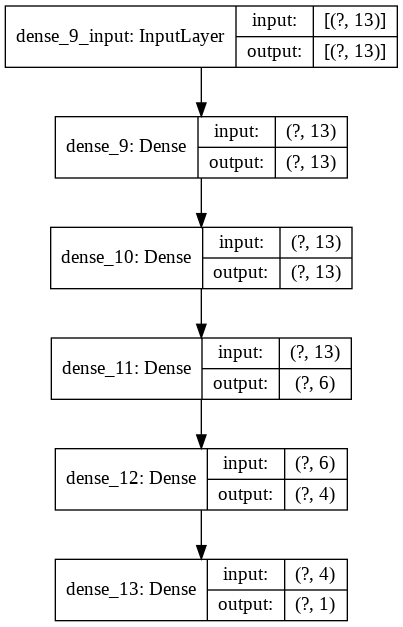

In [35]:
from keras.utils import plot_model
plot_model(model, to_file='model.png',show_shapes=True)

# <h1 id="keras">Entrenamiento y Evaluación del modelo</h1>

Ahora realizaremos diferentes entrenamientos de la red neuronal diseña y evaluaremos su desempeño.

In [36]:
#Entrena el modelo
x_val = x_train[300:,] # variables
y_val = y_train[300:,] # Etiquetas

In [37]:
#Entrena el modelo con 5 epochs/iteraciones
model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_val,y_val))

Epoch 1/5
13/13 [==============================] - 0s 16ms/step - loss: 590.3704 - mean_absolute_percentage_error: 99.9680 - val_loss: 536.6470 - val_mean_absolute_percentage_error: 99.9256
Epoch 2/5
13/13 [==============================] - 0s 4ms/step - loss: 589.7064 - mean_absolute_percentage_error: 99.8917 - val_loss: 535.9293 - val_mean_absolute_percentage_error: 99.8338
Epoch 3/5
13/13 [==============================] - 0s 4ms/step - loss: 588.7361 - mean_absolute_percentage_error: 99.7727 - val_loss: 534.5331 - val_mean_absolute_percentage_error: 99.6490
Epoch 4/5
13/13 [==============================] - 0s 4ms/step - loss: 586.2142 - mean_absolute_percentage_error: 99.4605 - val_loss: 530.1210 - val_mean_absolute_percentage_error: 99.0461
Epoch 5/5
13/13 [==============================] - 0s 4ms/step - loss: 577.7676 - mean_absolute_percentage_error: 98.3761 - val_loss: 515.5234 - val_mean_absolute_percentage_error: 96.9986


In [50]:
#Entrena el modelo con 100 epochs/iteraciones
model.fit(x_train, y_train, batch_size=32, epochs=500, validation_data=(x_val,y_val), verbose=0)

In [51]:
# Realizamos la evaluacion los datos de prueba
results = model.evaluate(x_test, y_test)


4/4 [==============================] - 0s 2ms/step - loss: 28.6718 - mean_absolute_percentage_error: 13.1184


In [53]:
results
# loss anterior 19.08304214477539
# loss 13/13/6/4/1 con 100 epochs 20.731382369995117
# loss 13/13/6/4/1 con 200 epochs 16.245285034179688
# loss 13/13/6/4/1 con 200 epochs 13.11836051940918
# loss 13/13/6/4/1 con 1000 epochs 16.245285034179688

[28.671772003173828, 13.11836051940918]

# Visualizando el proceso de entrenamiento


Vamos a evaluar la historia del entrenamiento mediante las distintas epocas.

In [58]:
history = model.fit(x_train, y_train, batch_size=32, epochs=500,validation_data=(x_val,y_val), verbose=0)
#verbose=0 evita imprimir en pantalla el output de los trainings

In [59]:
# Plotting process
import matplotlib.pyplot as plt

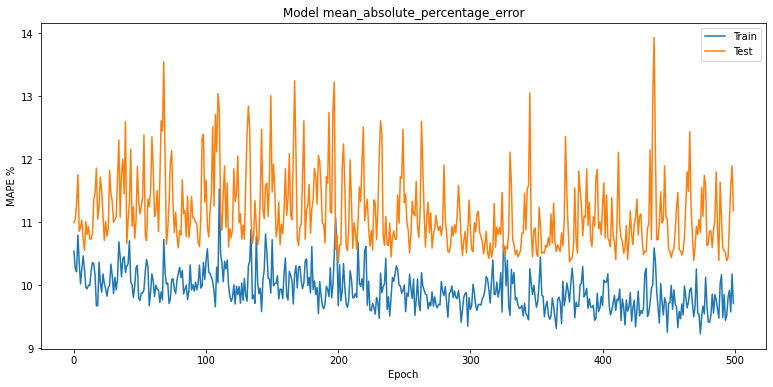

In [60]:
# Plot training & validation accuracy values
plt.figure(figsize=(13,6))
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

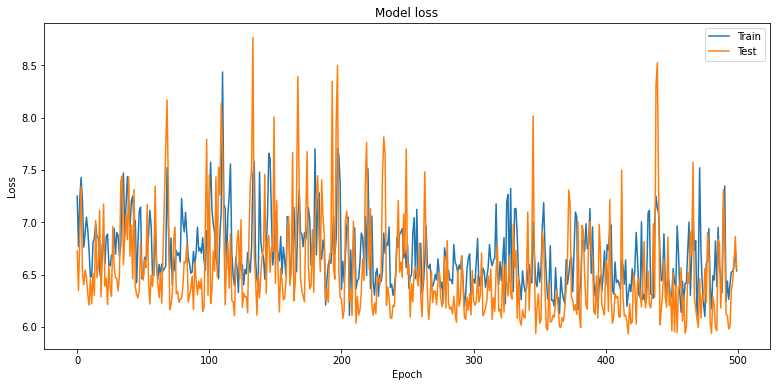

In [61]:
#Comparamos la funcion de perdida loss, indica en que direccion el algoritmo tiene 
# que enforcarse para aprender  mas sobre los datos

plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()